In [1]:
polyEval(coeffs, pt) = sum([coeffs[i] * pt^(i-1) for i = 1:length(coeffs)])  

polyEval (generic function with 1 method)

In [2]:
using JSON

In [3]:
coeffs_dict_Apr_AM = readall("../temp_files/coeffs_dict_Apr_AM_ext.json")
coeffs_dict_Apr_AM = JSON.parse(coeffs_dict_Apr_AM)

coeffs_dict_Apr_MD = readall("../temp_files/coeffs_dict_Apr_MD_ext.json")
coeffs_dict_Apr_MD = JSON.parse(coeffs_dict_Apr_MD)

coeffs_dict_Apr_PM = readall("../temp_files/coeffs_dict_Apr_PM_ext.json")
coeffs_dict_Apr_PM = JSON.parse(coeffs_dict_Apr_PM)

coeffs_dict_Apr_NT = readall("../temp_files/coeffs_dict_Apr_NT_ext.json")
coeffs_dict_Apr_NT = JSON.parse(coeffs_dict_Apr_NT)

coeffs_dict_Apr_weekend = readall("../temp_files/coeffs_dict_Apr_weekend_ext.json")
coeffs_dict_Apr_weekend = JSON.parse(coeffs_dict_Apr_weekend)


coeffs_best_Apr_AM = coeffs_dict_Apr_AM["(8,0.5,10000.0,1)"]
coeffs_best_Apr_MD = coeffs_dict_Apr_MD["(7,0.5,10000.0,1)"]
coeffs_best_Apr_PM = coeffs_dict_Apr_PM["(8,0.5,10000.0,1)"]
coeffs_best_Apr_NT = coeffs_dict_Apr_NT["(5,0.5,10000.0,2)"]
coeffs_best_Apr_weekend = coeffs_dict_Apr_weekend["(6,0.5,10000.0,3)"]

7-element Array{Any,1}:
  1.0       
  0.00236515
  0.00889769
 -0.0109764 
  0.0216779 
 -0.0135685 
  0.0042219 

/home/jzh/.julia/v0.3/Conda/deps/usr/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
INFO: Loading help data...


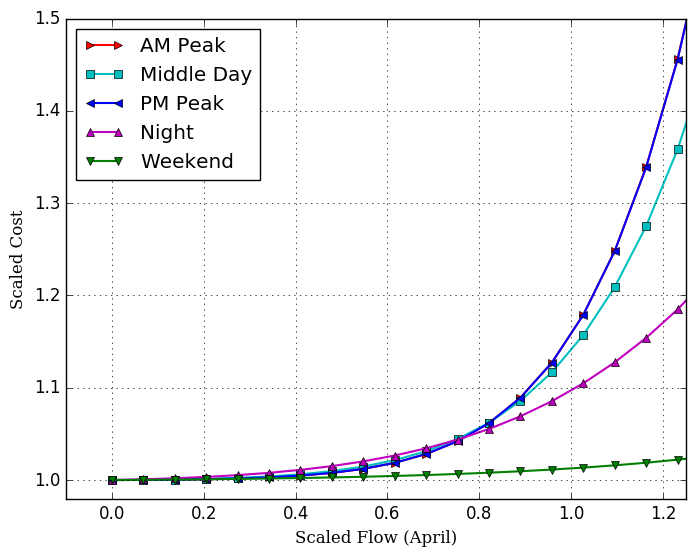

In [4]:
using PyPlot

xs = linspace(0, 1.3, 20)

#true_coeffs = [1, 0, 0, 0, .15]
#ys_true = map(x->polyEval(true_coeffs, x), xs)
#plot(xs, ys_true, "k", label="True")

ys_Apr_AM = map(x->polyEval(coeffs_best_Apr_AM, x), xs)
ys_Apr_MD = map(x->polyEval(coeffs_best_Apr_MD, x), xs)
ys_Apr_PM = map(x->polyEval(coeffs_best_Apr_PM, x), xs)
ys_Apr_NT = map(x->polyEval(coeffs_best_Apr_NT, x), xs)
ys_Apr_weekend = map(x->polyEval(coeffs_best_Apr_weekend, x), xs)

plot(xs, ys_Apr_AM, ">-r", label="AM Peak", linewidth=1.5)
plot(xs, ys_Apr_MD, "s-c", label="Middle Day", linewidth=1.5)
plot(xs, ys_Apr_PM, "<-b", label="PM Peak", linewidth=1.5)
plot(xs, ys_Apr_NT, "^-m", label="Night", linewidth=1.5)
plot(xs, ys_Apr_weekend, "v-g", label="Weekend", linewidth=1.5)

legend(loc="upper left") 

grid("on")
xlim(-0.1, 1.25);
ylim(0.98, 1.5);

font1 = ["family"=>"serif",
    "color"=>"black",
    "weight"=>"normal",
    "size"=>12]
xlabel("Scaled Flow (April)", fontdict=font1)
ylabel("Scaled Cost", fontdict=font1)

savefig("../temp_files/fitting_comparison_Apr_ext.pdf")

In [5]:
outfile = open("../temp_files/cost_func_Apr_ext.txt", "w")

write(outfile,"coeffs_Apr_AM: $(coeffs_best_Apr_AM) \n \
coeffs_Apr_MD: $(coeffs_best_Apr_MD) \n \
coeffs_Apr_PM: $(coeffs_best_Apr_PM) \n \
coeffs_Apr_NT: $(coeffs_best_Apr_NT) \n \
coeffs_Apr_weekend: $(coeffs_best_Apr_weekend) \n")

close(outfile)